In [2]:
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('../data/processed/crypto_data_processed.csv')
data.head()


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
0,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09,0
1,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09,0
2,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09,0
3,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,2023-03-01 23:59:59.999,7.441571e+09,9390487,157961.92667,3.728257e+09,0
4,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.45219,2023-03-02 23:59:59.999,5.603770e+09,7435815,119522.00584,2.798798e+09,0


In [32]:
# check 1-day return
data['1_day_return'] = data['close'].pct_change(periods=1)
data[['close', '1_day_return']].head()

,close,1_day_return
0,23554.85,NaN
1,23492.09,-0.002664
2,23141.57,-0.014921
3,23628.97,0.021062
4,23465.32,-0.006926


In [33]:
# check 7-day return
data['7_day_return'] = data['close'].pct_change(periods=7)
data[['close', '7_day_return']].head()

,close,7_day_return
0,23554.85,NaN
1,23492.09,NaN
2,23141.57,NaN
3,23628.97,NaN
4,23465.32,NaN


In [34]:
# checking the rolling volatility
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data[['1_day_return', '7_day_volatility']].tail()


,1_day_return,7_day_volatility
995,-0.021709,0.018468
996,0.008086,0.020649
997,-0.015123,0.020647
998,-0.053713,0.025472
999,-0.042845,0.023903


In [35]:
### **2. Technical Indicators**

#Using `ta` or `ta-lib`:

# RSI\
 #MACD\
 #Moving averages (SMA20, SMA50, SMA200)\
 #Bollinger Bands\
 #Stochastic Oscillator
data['rsi'] = ta.momentum.RSIIndicator(data['close']).rsi()
data['macd'] = ta.trend.MACD(data['close']).macd()
data['sma20'] = ta.trend.SMAIndicator(data['close'], window=20).sma_indicator()
data['sma50'] = ta.trend.SMAIndicator(data['close'], window=50).sma_indicator()
data['sma200'] = ta.trend.SMAIndicator(data['close'], window=200).sma_indicator()
bb_indicator = ta.volatility.BollingerBands(data['close'])
data['bb_high'] = bb_indicator.bollinger_hband()
data['bb_low'] = bb_indicator.bollinger_lband()
data['stochastic_oscillator'] = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close']).stoch()
data.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_return,7_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
995,2025-11-17,94261.45,96043.00,91220.00,92215.14,39218.59806,2025-11-17 23:59:59.999,3.674562e+09,8134322,18690.19245,...,-0.130137,0.018468,28.830303,-4256.195101,102968.0365,109887.8414,110423.54295,113836.973973,92099.099027,6.112654
996,2025-11-18,92215.14,93836.01,89253.78,92960.83,39835.14769,2025-11-18 23:59:59.999,3.641033e+09,8786593,20130.95957,...,-0.097984,0.020649,30.755973,-4429.984767,102115.0135,109460.8188,110403.91140,113308.867538,90921.159462,20.316811
997,2025-11-19,92960.83,92980.22,88608.00,91554.96,32286.63760,2025-11-19 23:59:59.999,2.925774e+09,6822174,15060.08451,...,-0.099350,0.020647,29.154345,-4627.809778,101276.6175,109010.9394,110382.40410,112984.997469,89568.237531,15.598984
998,2025-11-20,91554.96,93160.00,86100.00,86637.23,39733.19073,2025-11-20 23:59:59.999,3.548950e+09,7841395,18283.84047,...,-0.130951,0.025472,24.373044,-5122.359860,100128.0785,108371.7842,110344.20215,112808.358751,87447.798249,2.510421
999,2025-11-21,86637.22,87498.94,81648.00,82925.22,35822.86260,2025-11-21 23:59:59.999,3.015786e+09,5270046,16068.22367,...,-0.123356,0.023903,21.506016,-5747.568160,98769.4345,107619.7016,110285.15985,112651.554495,84887.314505,4.940508


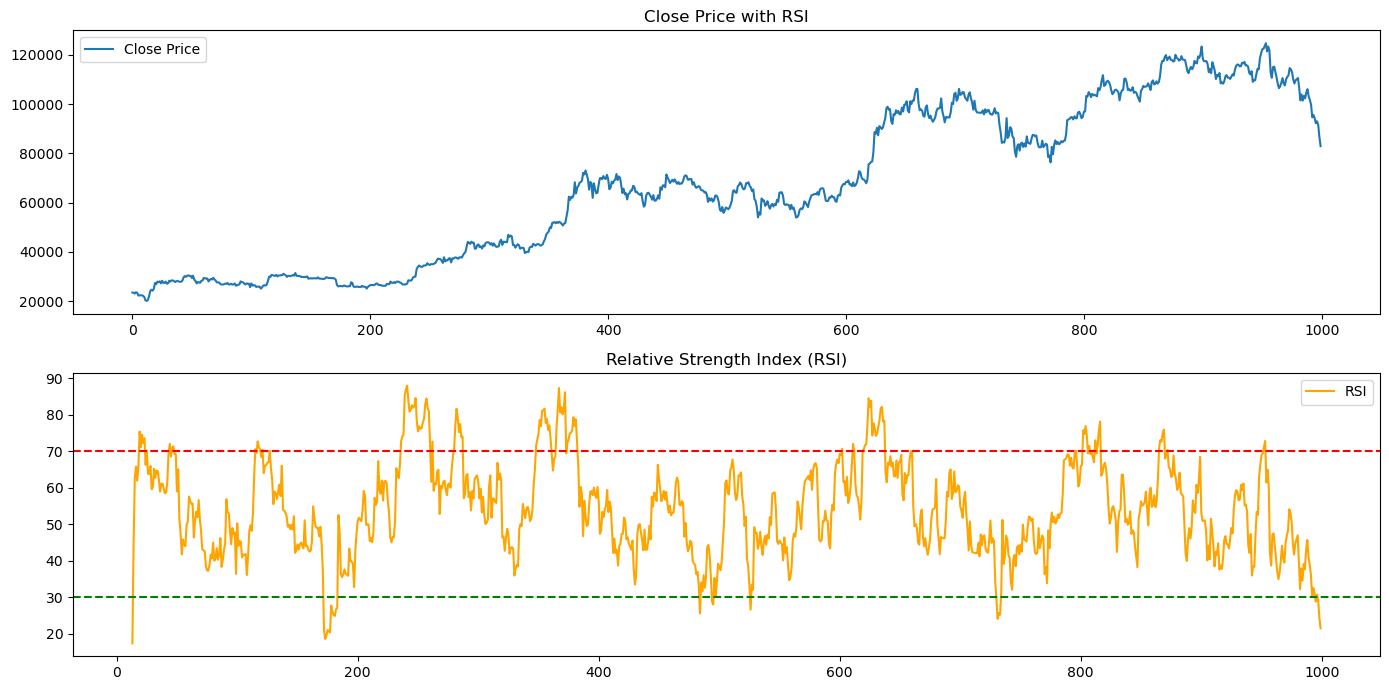

In [36]:
#visualize the features of rsi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with RSI')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()

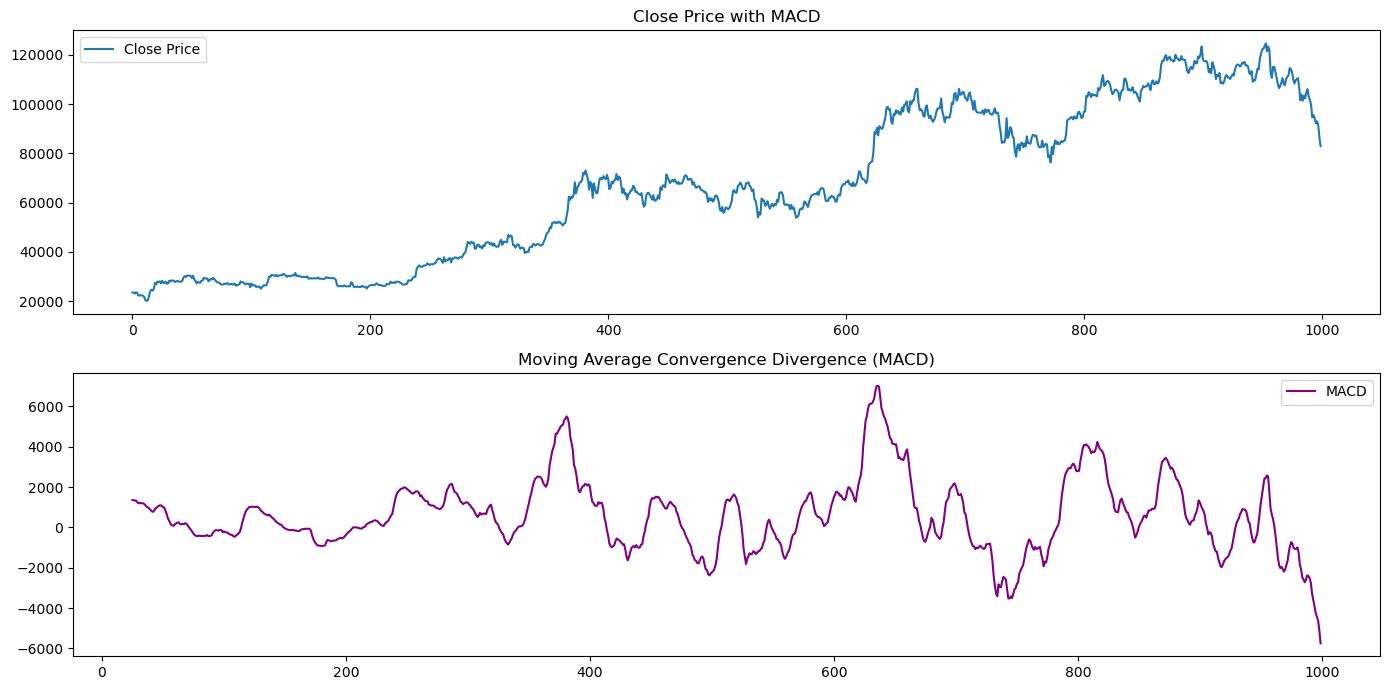

In [37]:
# visualize macd features with the signal line
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with MACD')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['macd'], label='MACD', color='purple')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.tight_layout()



plt.show()

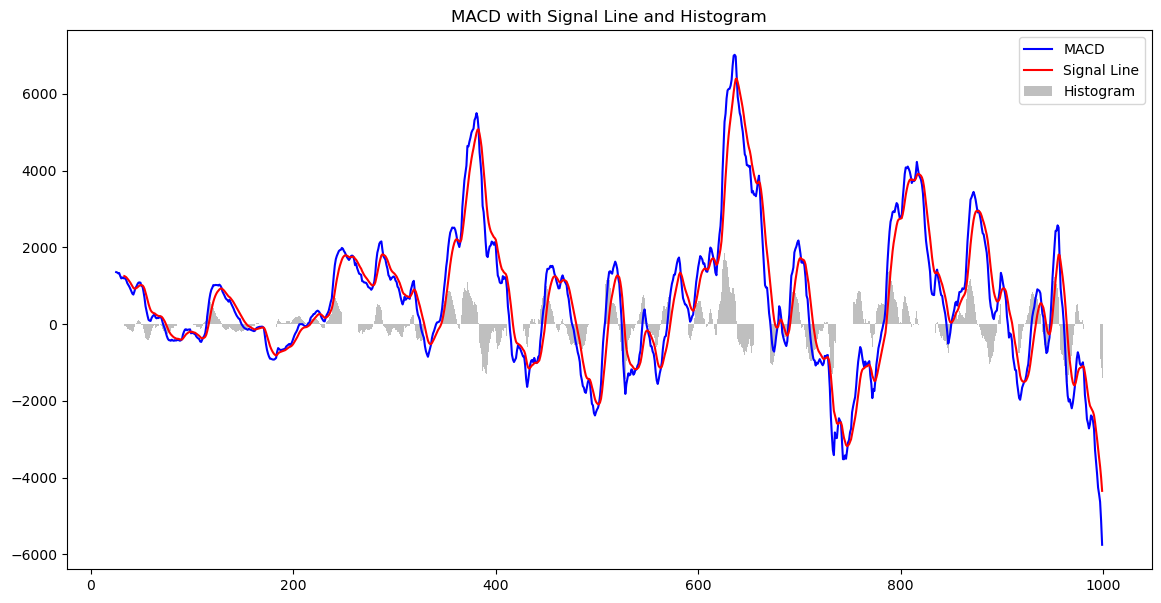

In [38]:
#plot macd with signal and histogram
plt.figure(figsize=(14,7))
plt.plot(data['macd'], label='MACD', color='blue')
macd_full = ta.trend.MACD(data['close'])
plt.plot(macd_full.macd_signal(), label='Signal Line', color='red')
plt.bar(data.index, macd_full.macd_diff(), label='Histogram', color='gray', alpha=0.5)
plt.title('MACD with Signal Line and Histogram')
plt.legend()
plt.show()

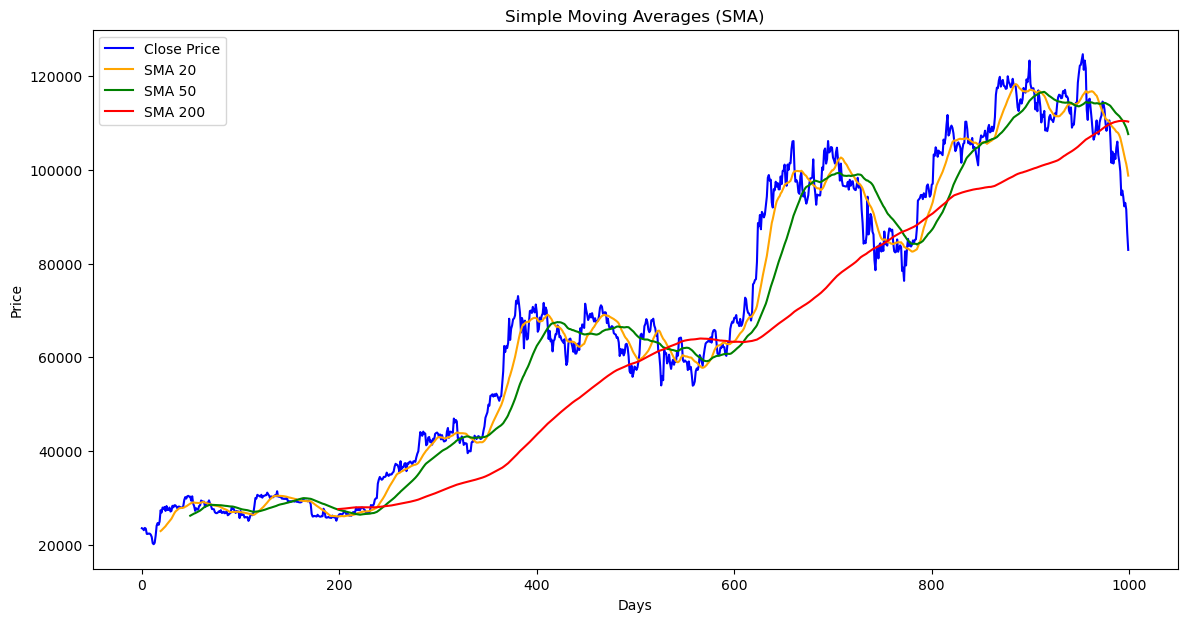

In [39]:
# Visualize the sma20, sma50, sma200 features
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')  
plt.plot(data['sma20'], label='SMA 20', color='orange')
plt.plot(data['sma50'], label='SMA 50', color='green')
plt.plot(data['sma200'], label='SMA 200', color='red')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

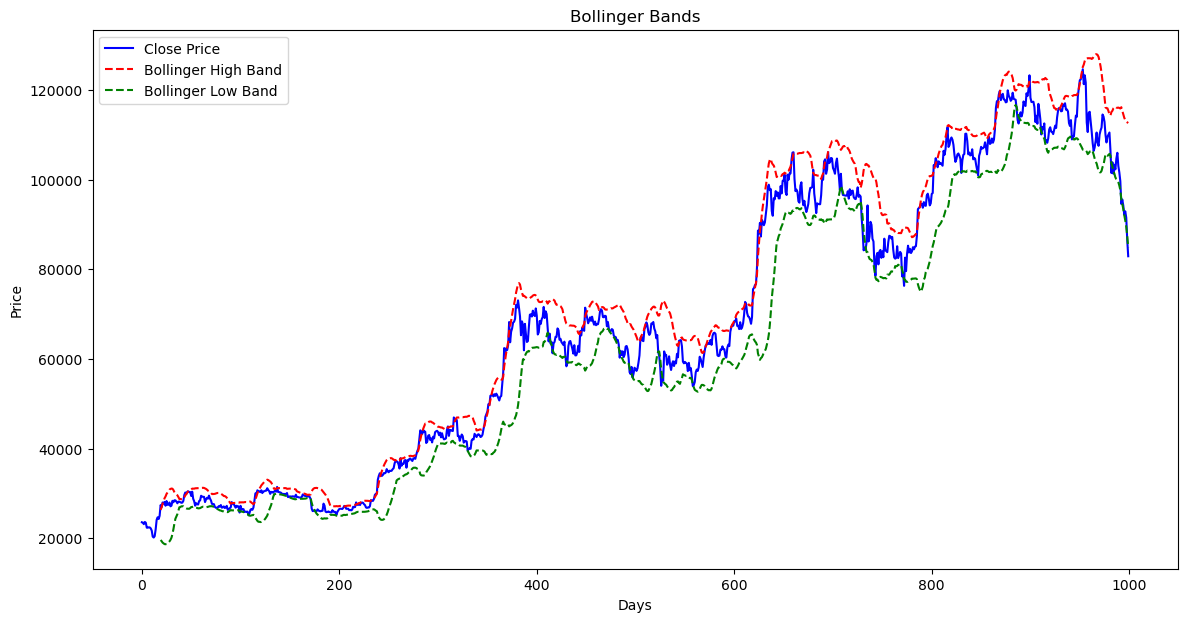

In [40]:
# visualize the bollinger bands
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(data['bb_high'], label='Bollinger High Band', color='red', linestyle='--')
plt.plot(data['bb_low'], label='Bollinger Low Band', color='green', linestyle='--')
plt.title('Bollinger Bands')   
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

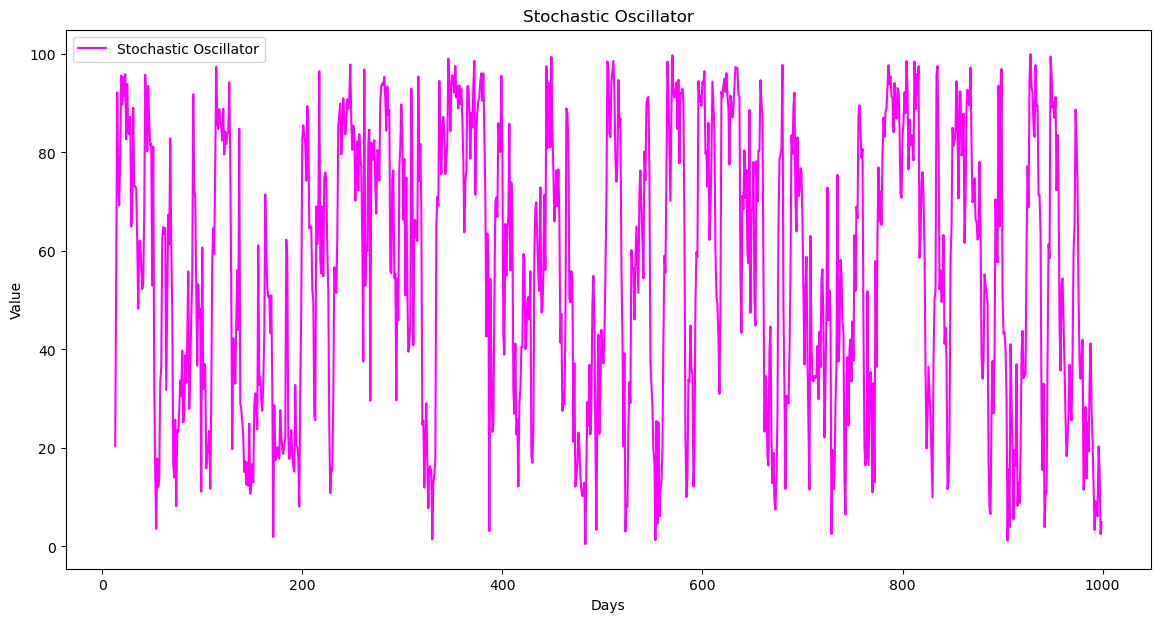

In [41]:
# visualize the stochastic oscillator
plt.figure(figsize=(14,7))
plt.plot(data['stochastic_oscillator'], label='Stochastic Oscillator', color='magenta')
plt.title('Stochastic Oscillator')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()

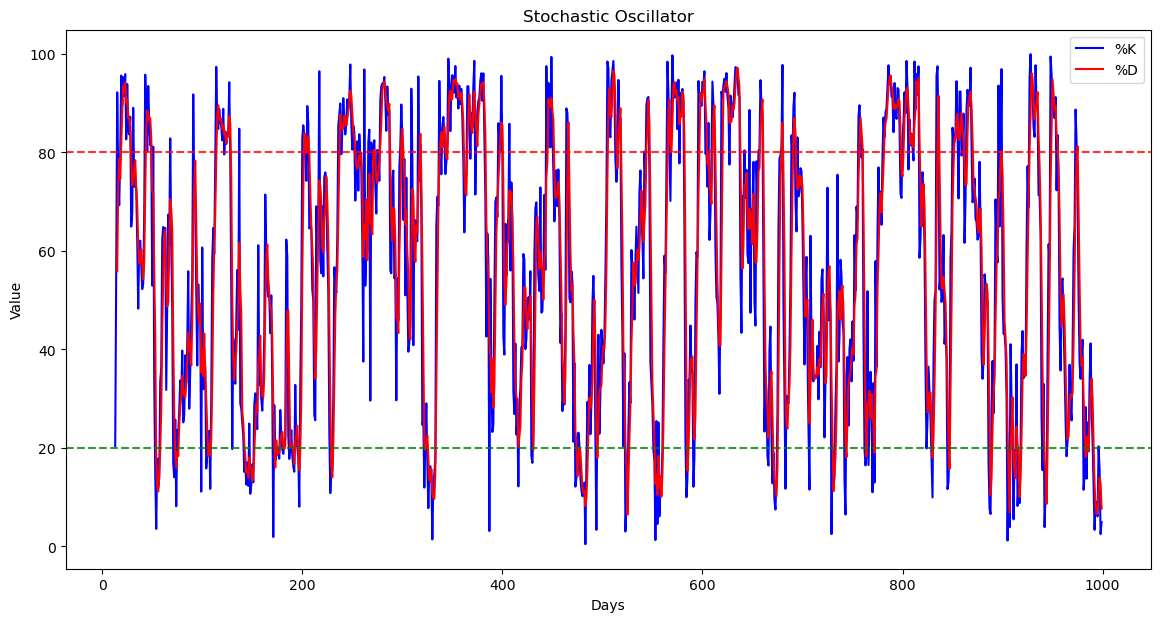

In [42]:
# visualize the stochastic oscillator with %k and %d
plt.figure(figsize=(14,7))
plt.plot(data['stochastic_oscillator'], label='%K', color='blue') 
stoch = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close'])
plt.plot(stoch.stoch_signal(), label='%D', color='red')
plt.axhline(80, color='red', linestyle='--', alpha=0.8)
plt.axhline(20, color='green', linestyle='--', alpha=0.8)
plt.title('Stochastic Oscillator')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()

In [43]:
#need to save the new data with features and labels
# data.to_csv('../data/processed/crypto_data_features_labels.csv', index=False)

In [44]:
data= data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  ignore                 801 non-null    int64  
 12  1_day_return           801 non-null    float64
 13  7_day_return           801 non-null    float64
 14  7_day_volatility       801 non-null    float64
 15  rsi   

In [45]:
# drop ignore column
data = data.drop(columns=['ignore'])


In [46]:
# change date to datetime
data["open_time"] = pd.to_datetime(data["open_time"])
data["close_time"] = pd.to_datetime(data["close_time"])
data["close"] = data["close"].astype(float)
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_return,7_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
0,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,0.017937,0.018843,47.503161,-448.682115,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602
1,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,0.010197,0.017915,50.937342,-369.883285,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862
2,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,0.026611,0.016705,51.809648,-297.767128,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788
3,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,0.025406,0.016760,51.297008,-241.089716,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095
4,2023-09-17,26559.67,26623.25,26399.00,26527.51,12998.10277,2023-09-17 23:59:59.999,3.447037e+08,476775,6359.89459,...,0.026542,0.016699,50.864802,-196.502344,26166.2100,27296.0134,27707.64800,27296.036371,25036.383629,81.857574


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   open_time              801 non-null    datetime64[ns]
 1   open                   801 non-null    float64       
 2   high                   801 non-null    float64       
 3   low                    801 non-null    float64       
 4   close                  801 non-null    float64       
 5   volume                 801 non-null    float64       
 6   close_time             801 non-null    datetime64[ns]
 7   quote_asset_volume     801 non-null    float64       
 8   num_trades             801 non-null    int64         
 9   taker_base_volume      801 non-null    float64       
 10  taker_quote_volume     801 non-null    float64       
 11  1_day_return           801 non-null    float64       
 12  7_day_return           801 non-null    float64       
 13  7_day

In [50]:
corr_pairs = corr.unstack()
corr_pairs = corr_pairs.drop_duplicates()

# Sort by strongest relationships
strong_corr = corr_pairs.abs().sort_values(ascending=False)

print("\nTop correlated feature pairs:\n")
print(strong_corr.head(20))



Top correlated feature pairs:

open_time           open_time             1.000000
high                close                 0.998949
open                high                  0.998808
low                 close                 0.998710
open                low                   0.998303
high                low                   0.997873
open                close                 0.997582
volume              taker_base_volume     0.997087
quote_asset_volume  taker_quote_volume    0.996429
sma20               bb_high               0.995533
open_time           sma200                0.995245
sma20               bb_low                0.994657
high                bb_high               0.989676
open                bb_high               0.989466
                    sma20                 0.989390
high                sma20                 0.988760
sma20               sma50                 0.988738
close               bb_high               0.987734
                    sma20                 0.987369

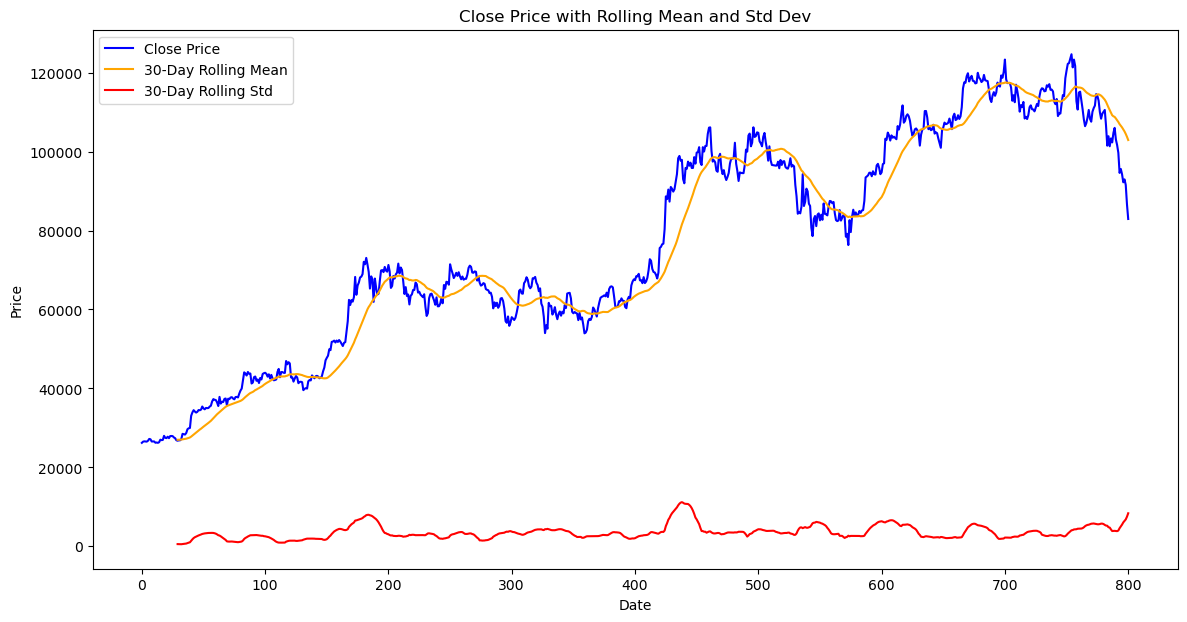

In [52]:
# plot using rolling mean and rolling std
rolling_mean = data['close'].rolling(window=30).mean()
rolling_std = data['close'].rolling(window=30).std()
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange') 
plt.plot(rolling_std, label='30-Day Rolling Std', color='red')
plt.title('Close Price with Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

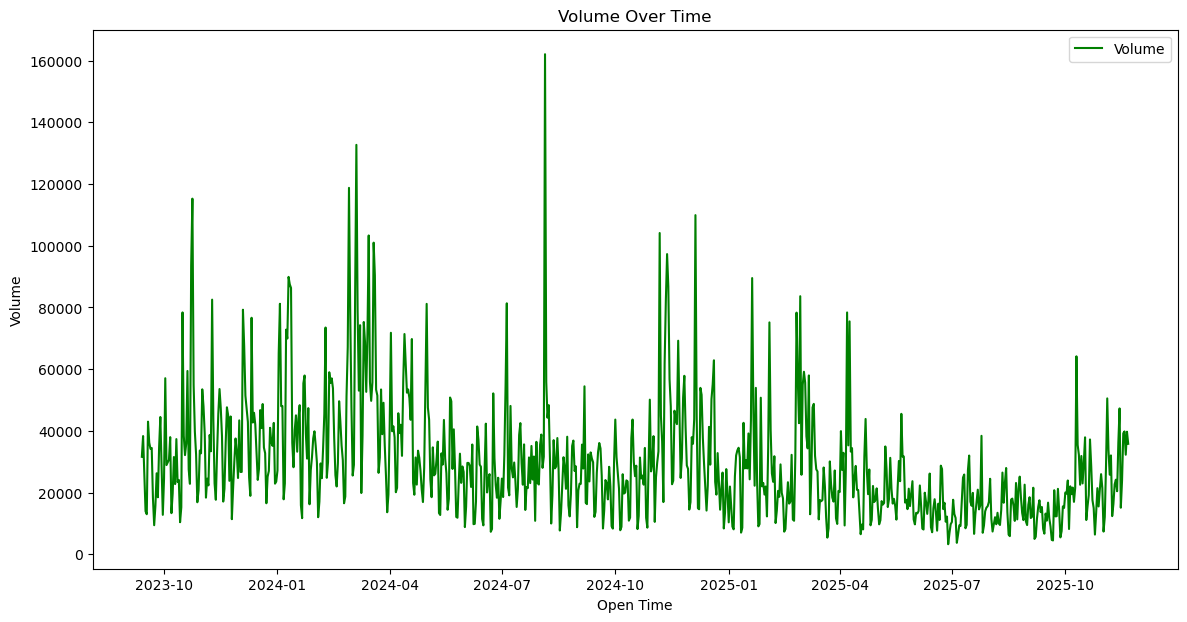

In [54]:
# plot volume overtime 
plt.figure(figsize=(14,7))
plt.plot(data['open_time'], data['volume'], label='Volume', color='green')
plt.title('Volume Over Time')
plt.xlabel('Open Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [ ]:
# save to csv
data.to_csv('data\processed\crypto_data_features_labels.csv', index=False)